# Covid no Brasil
## Análise dos casos de corona virus no Brasil até o dia 22 de Abril ed 2020
Esse notebbok foi criado por [mateus](https://twitter.com/mateusmata14) com o objetivo de estudar algumas bibliotecas do python.
Os dados foram obtidos no dia 23 de Abril no site [covid.saude.gov.br](https://covid.saude.gov.br/)

## importando bibliotecas e lendo os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
corona_original = pd.read_csv(r'C:\Users\mateu\OneDrive\Documentos\Programação\dados\corona\arquivo_geral_22-04.csv', sep=';')
#covid_BR_19 = covid_BR_19.drop(columns=['region']).copy()
corona_original.head() #2268 linhas

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


## Rio de Janeiro
A primeira análise sera feita para o estado do Rio de janeiro

### Dataset do Rio

In [3]:
rj = corona_original.drop(columns=['regiao']).copy()   #eliminando a coluna de região
rj = rj.loc[rj.estado == 'RJ']                         #Selecionando apenas casos do RJ
rj = rj.loc[rj.casosNovos>0]                           #Pegando dados a partir do primeiro caso 
rj = rj.reset_index().drop(columns=['index'])          #Resetando o index
rj.head()

,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,RJ,2020-03-05,1,1,0,0
1,RJ,2020-03-07,1,2,0,0
2,RJ,2020-03-08,1,3,0,0
3,RJ,2020-03-10,5,8,0,0
4,RJ,2020-03-11,5,13,0,0


### Dados
Aqui separei os dados que usarei para plotar a respeito do estado do Rio

In [4]:
rj['mes'] = pd.to_datetime(rj['data']).dt.month #.dt.to_period('m') # Retirando o ano da data, pois todos os caso aconteceram em 2020
rj['data2'] = pd.to_datetime(rj['data']).dt.strftime('%d / %m')
rj.head()

,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados,mes,data2
0,RJ,2020-03-05,1,1,0,0,3,05 / 03
1,RJ,2020-03-07,1,2,0,0,3,07 / 03
2,RJ,2020-03-08,1,3,0,0,3,08 / 03
3,RJ,2020-03-10,5,8,0,0,3,10 / 03
4,RJ,2020-03-11,5,13,0,0,3,11 / 03


In [5]:
#rj.data2

### Gráficos

#### Casos acumulados no Rio

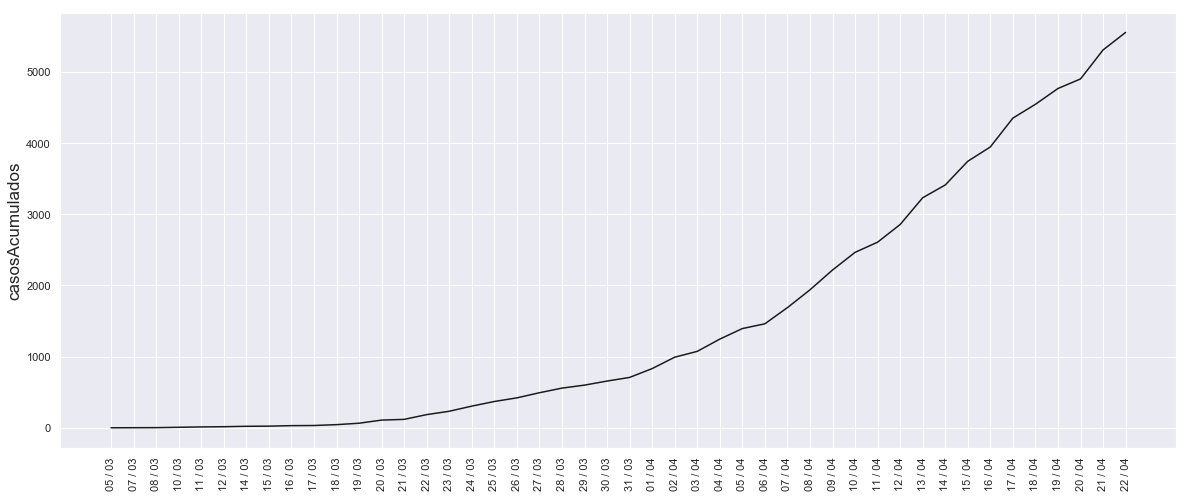

In [63]:
fig, ax = plt.subplots(1,1,figsize=(20, 8))
sns.lineplot(x=np.arange(len(rj['data2'])), y=rj['casosAcumulados'], color='k', linestyle='dashed')
ax.set_xticklabels(rj['data2'])
ax.set_xticks(np.arange(len(rj['data2'])))
plt.xticks(rotation=90)
plt.show()
#g.fig.autofmt_xdate()

#### obito acumulado no rio

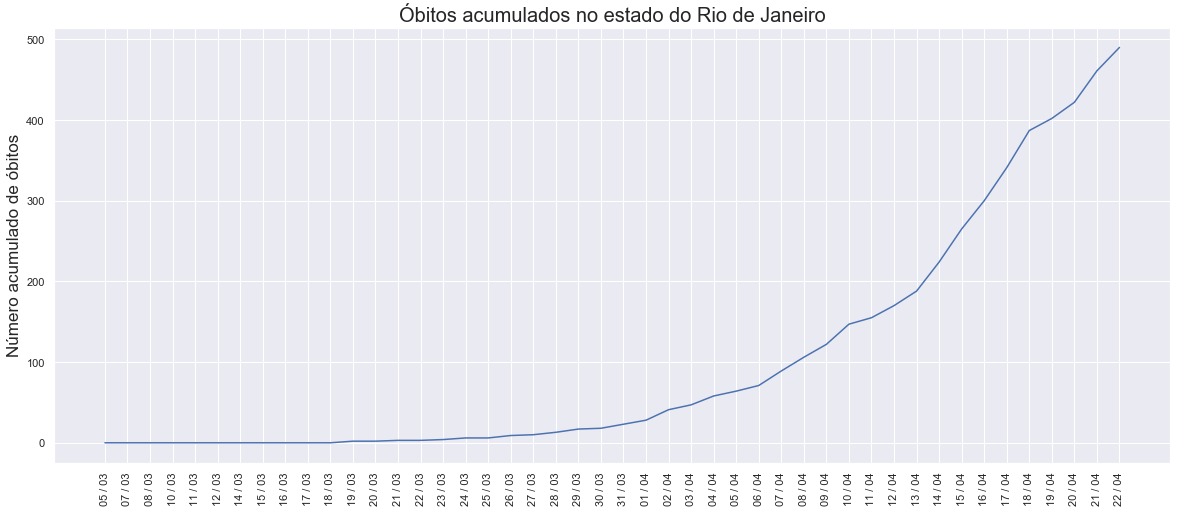

In [62]:
fig, ax = plt.subplots(1,1,figsize=(20, 8))
sns.lineplot(x=np.arange(len(rj['data2'])), y=rj['obitosAcumulados'], palette='Muted')   #plot do grafico
sns.set_context("notebook")
sns.set(rc={"font.size":10,"axes.labelsize":17})
ax.set_xticklabels(rj['data2'])                                                    #Definindo os valores do eixo x
ax.set_xticks(np.arange(len(rj['data2'])))                                         #
ax.set_ylabel('Número acumulado de óbitos')                                        #nome do eixo Y  
plt.xticks(rotation=90)                                                            #rotação do valores do eixo x    4
ax.set_title('Óbitos acumulados no estado do Rio de Janeiro', fontsize=20)         #titulo do grafico
ax.grid(True)


plt.show()

## Teste

In [8]:
np.arange(len(rj['data2']))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [58]:
#sns.pairplot(data=rj);